<a href="https://colab.research.google.com/github/Rafly230204/python-random-quote/blob/master/Prediksi_Produksi_Beras_Pulau_Sumatera_Dengan_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan Data

**Pendahuluan**


Pulau Sumatera memiliki lebih dari 50 persen lahan pertanian di setiap provinsi dengan komoditas pangan utama yang paling dominan adalah padi, sedangkan komoditas minor lainnya adalah jagung, kacang tanah, dan ubi jalar. Hasil pertanian di Pulau Sumatera sangat rentan terhadap perubahan iklim dan dampak negatifnya dapat mempengaruhi pola tanam, waktu tanam, produksi dan kualitas hasil panen. Terlebih lagi peningkatan suhu bumi akibat dampak pemanasan global yang akan mempengaruhi pola curah hujan, penguapan, limpasan air, kelembaban tanah, dan variasi iklim yang sangat fluktuatif secara keseluruhan dapat mengancam keberhasilan produksi pertanian.

Data tersebut merupakan catatan informasi terkait dari tahun 1993 hingga 2020 yang meliputi 8 provinsi di Pulau Sumatera, yaitu Nanggroe Aceh Darussalam, Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu, dan Lampung.


Tujuan dari tugas ini adalah untuk memprediksi produksi beras di Pulau Sumatera berdasarkan data yang terkumpul selama 28 tahun terakhir.

**1. Load Dataset**

In [ ]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    print(df.head())


Saving Data_Tanaman_Padi_Sumatera_version_1.csv to Data_Tanaman_Padi_Sumatera_version_1.csv
  Province  Year  Production  Land Area  Rainfall  Humidity  \
0     Aceh  1993   1329536.0   323589.0    1627.0     82.00   
1     Aceh  1994   1299699.0   329041.0    1521.0     82.12   
2     Aceh  1995   1382905.0   339253.0    1476.0     82.72   
3     Aceh  1996   1419128.0   348223.0    1557.0     83.00   
4     Aceh  1997   1368074.0   337561.0    1339.0     82.46   

   Average Temperature  
0                26.06  
1                26.92  
2                26.27  
3                26.08  
4                26.31  


In [ ]:
data = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')
data

,Province,Year,Production,Land Area,Rainfall,Humidity,Average Temperature
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [ ]:
#check row and column
data.shape

(224, 7)

Total data adalah 224 data yang mana setiap provinsi memiliki 28 data tahunan.

Dataset ini terdiri dari atribut-atribut berikut:

Provinsi: Nama provinsi
Tahun: Tahun produksi beras
Produksi: Hasil produksi atau panen tahunan (ton)
Luas Lahan: Luas lahan pertanian (hektar)
Curah hujan: Jumlah rata-rata curah hujan dalam setahun (milimeter)
Kelembaban: Tingkat kelembapan rata-rata dalam setahun (persentase)
Suhu rata-rata: Tingkat suhu rata-rata dalam satu tahun (celcius)
Atribut nomor 1 - 4 diambil dari Database Badan Pusat Statistik, dan atribut lainnya diambil dari Database Badan Meteorologi, Klimatologi, dan Geofisika


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province             224 non-null    object 
 1   Year                 224 non-null    int64  
 2   Production           224 non-null    float64
 3   Land Area            224 non-null    float64
 4   Rainfall             224 non-null    float64
 5   Humidity             224 non-null    float64
 6   Average Temperature  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


**2. Exploratory Data Analysis**

In [ ]:
data.isnull().sum()

,0
Province,0
Year,0
Production,0
Land Area,0
Rainfall,0
Humidity,0
Average Temperature,0


In [ ]:
#overview statistics descriptive
data.describe()

,Year,Production,Land Area,Rainfall,Humidity,Average Temperature
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Rata-rata hasil panen di 8 provinsi selama 28 tahun adalah 1679700.887 ton dengan hasil terendah 42938 ton dan tertinggi 4881089 ton. Rata-rata luas lahan pertanian adalah 37.433.450 hektar.

Dari deskripsi data di atas, dapat dilihat bahwa nilai mean dan median dari masing-masing atribut tidak jauh berbeda. Sehingga dapat dikatakan bahwa data tersebut berdistribusi normal

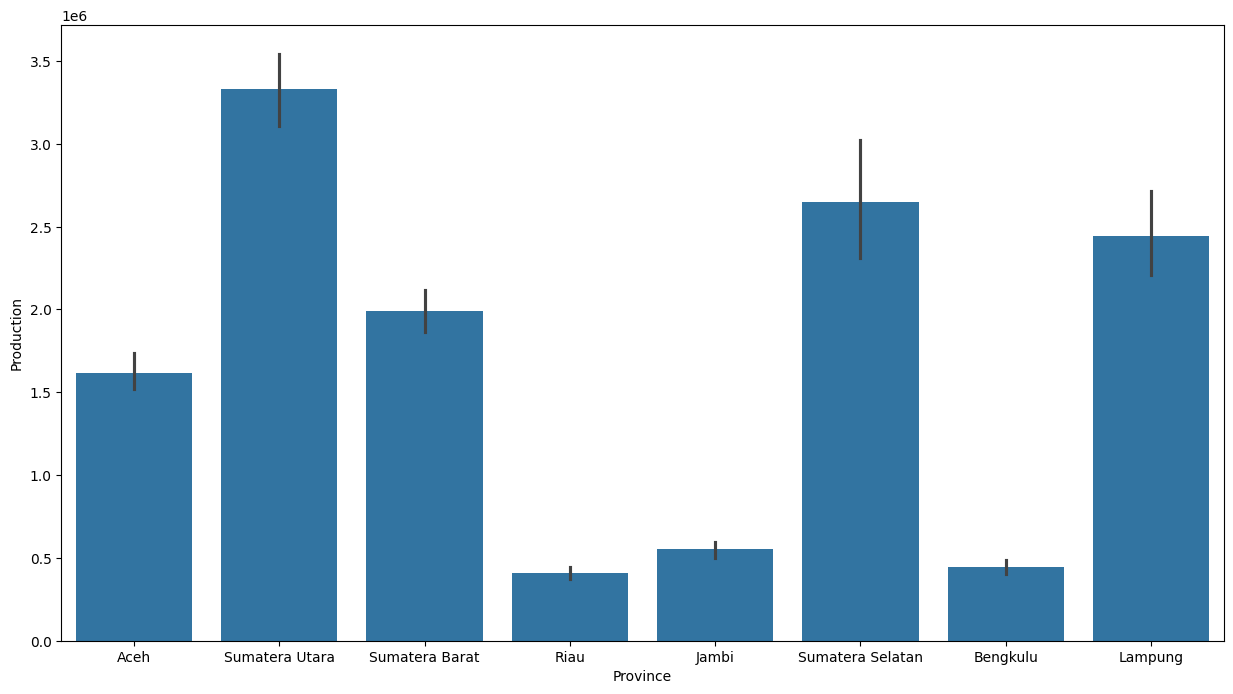

In [ ]:
plt.figure(figsize=(15,8))
# Specify x, y, and data arguments explicitly
sns.barplot(x='Province', y='Production', data=data)
plt.show()

In [ ]:
pd.pivot_table(data,index=['Province'],values=['Production'], aggfunc=np.mean)

<ipython-input-25-d423b3ebc27a>:1: FutureWarning: The provided callable <function mean at 0x7c2da2222020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data,index=['Province'],values=['Production'], aggfunc=np.mean)


,Production
Province,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


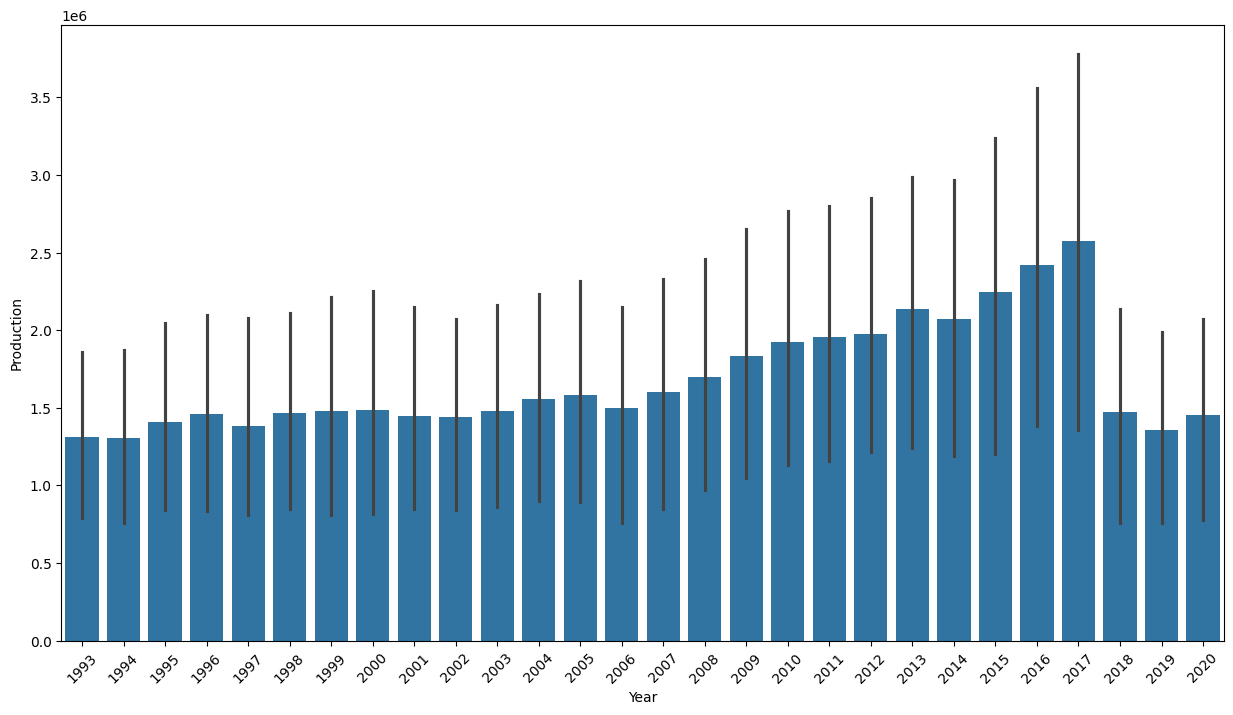

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Year', y='Production', data=data)
plt.xticks(rotation=45)
plt.show()

Tahun dengan produksi terbesar adalah tahun 2017, tetapi pada tahun-tahun berikutnya produksi mengalami penurunan yang signifikan.

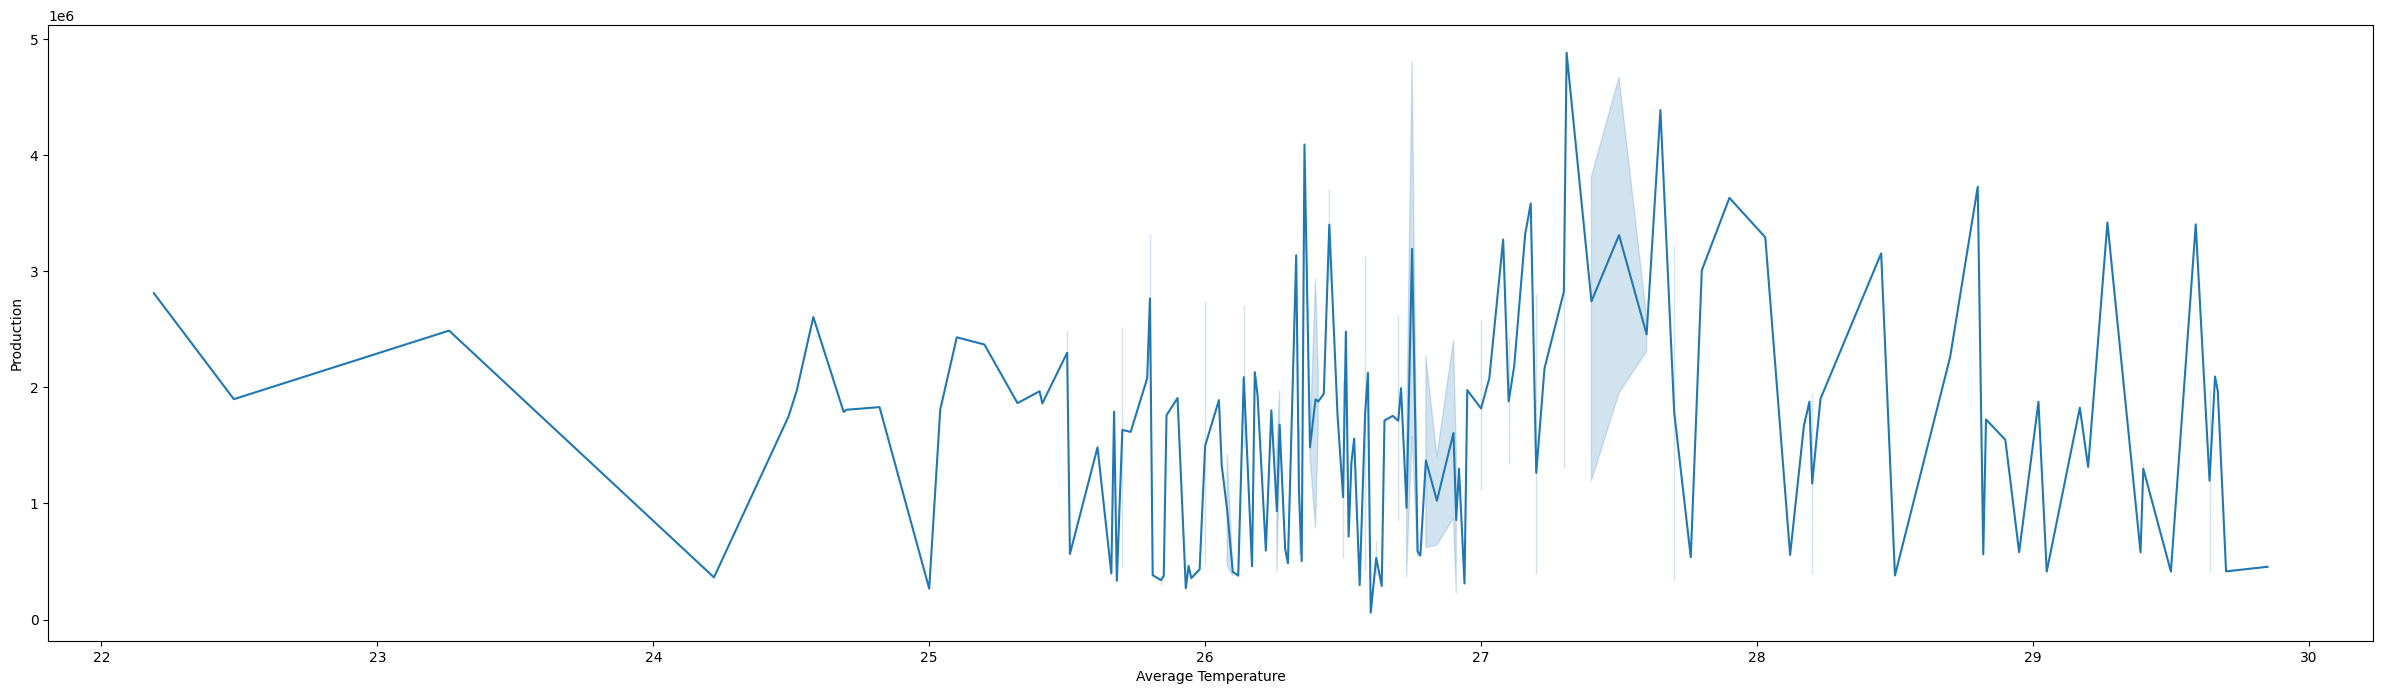

In [ ]:
plt.figure(figsize=(30,8))
# Specify the data, x, and y arguments explicitly
sns.lineplot(data=data, x='Average Temperature', y='Production')
plt.show()

Produksi maksimum terjadi apabila suhu rata-rata berada pada kisaran 27-28 derajat Celcius.

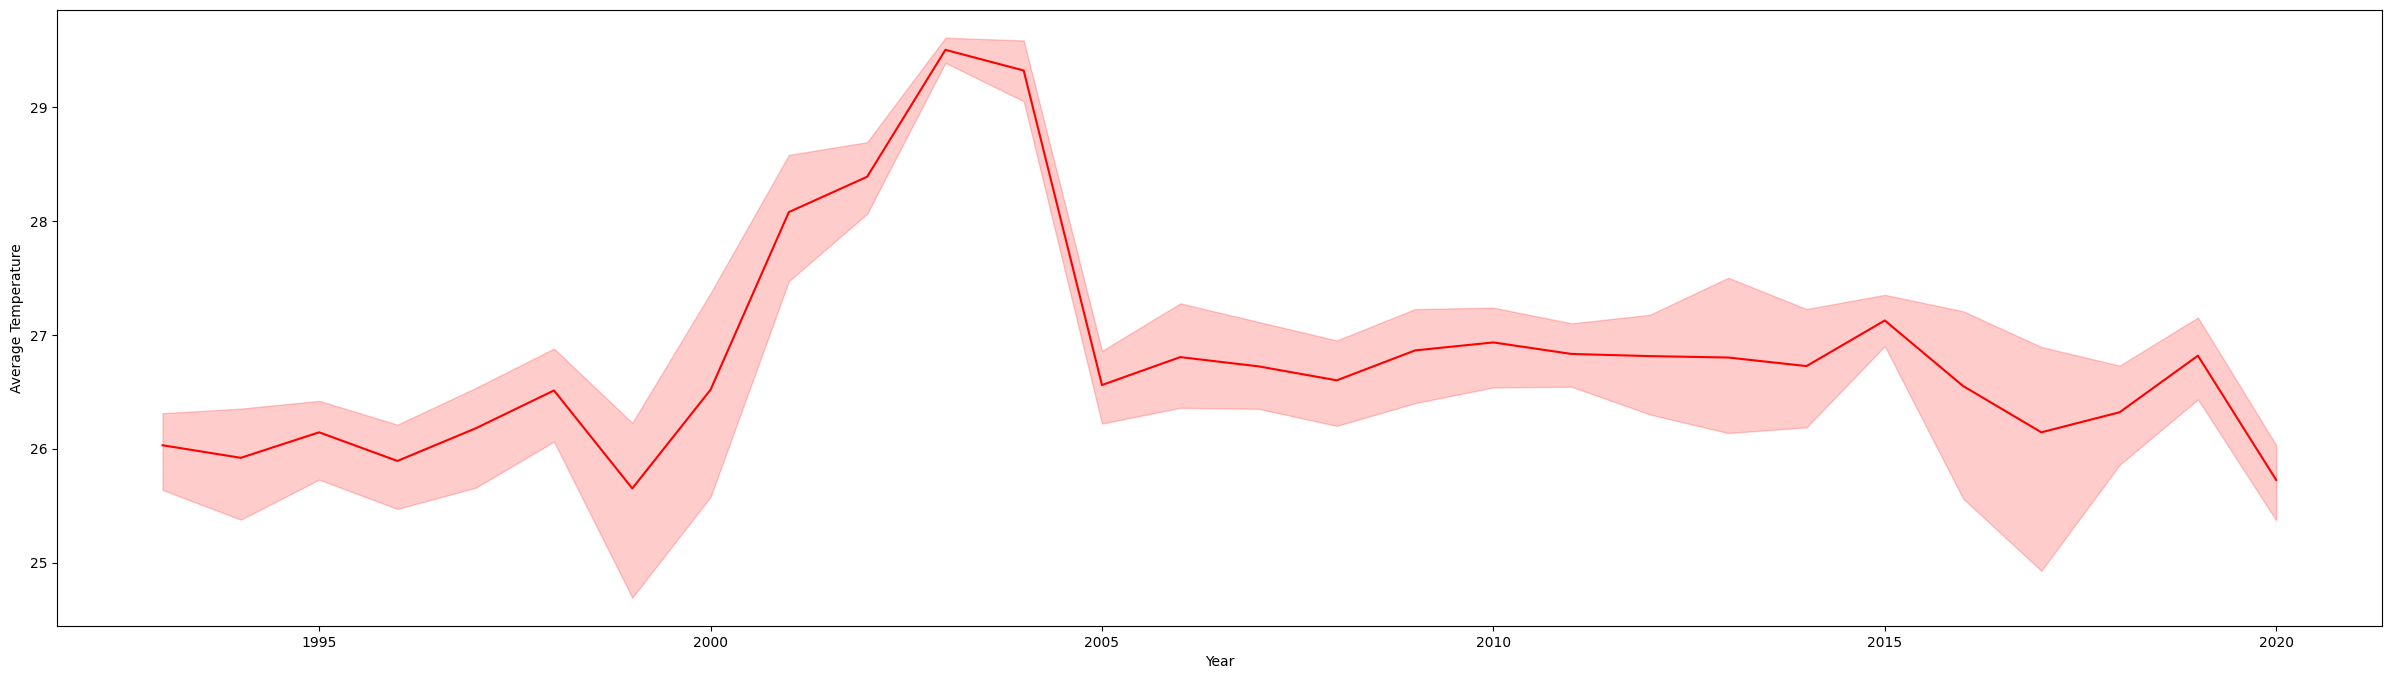

In [ ]:
plt.figure(figsize=(30,8))
# Specify the data, x, and y arguments explicitly
sns.lineplot(data=data, x='Year', y='Average Temperature', color='red')
plt.show()

Suhu rata-rata tertinggi yang pernah dicapai pada tahun 2000-2005, yaitu lebih dari 29 derajat Celcius, namun pada tahun-tahun berikutnya cenderung stabil di kisaran suhu 27 derajat Celcius.

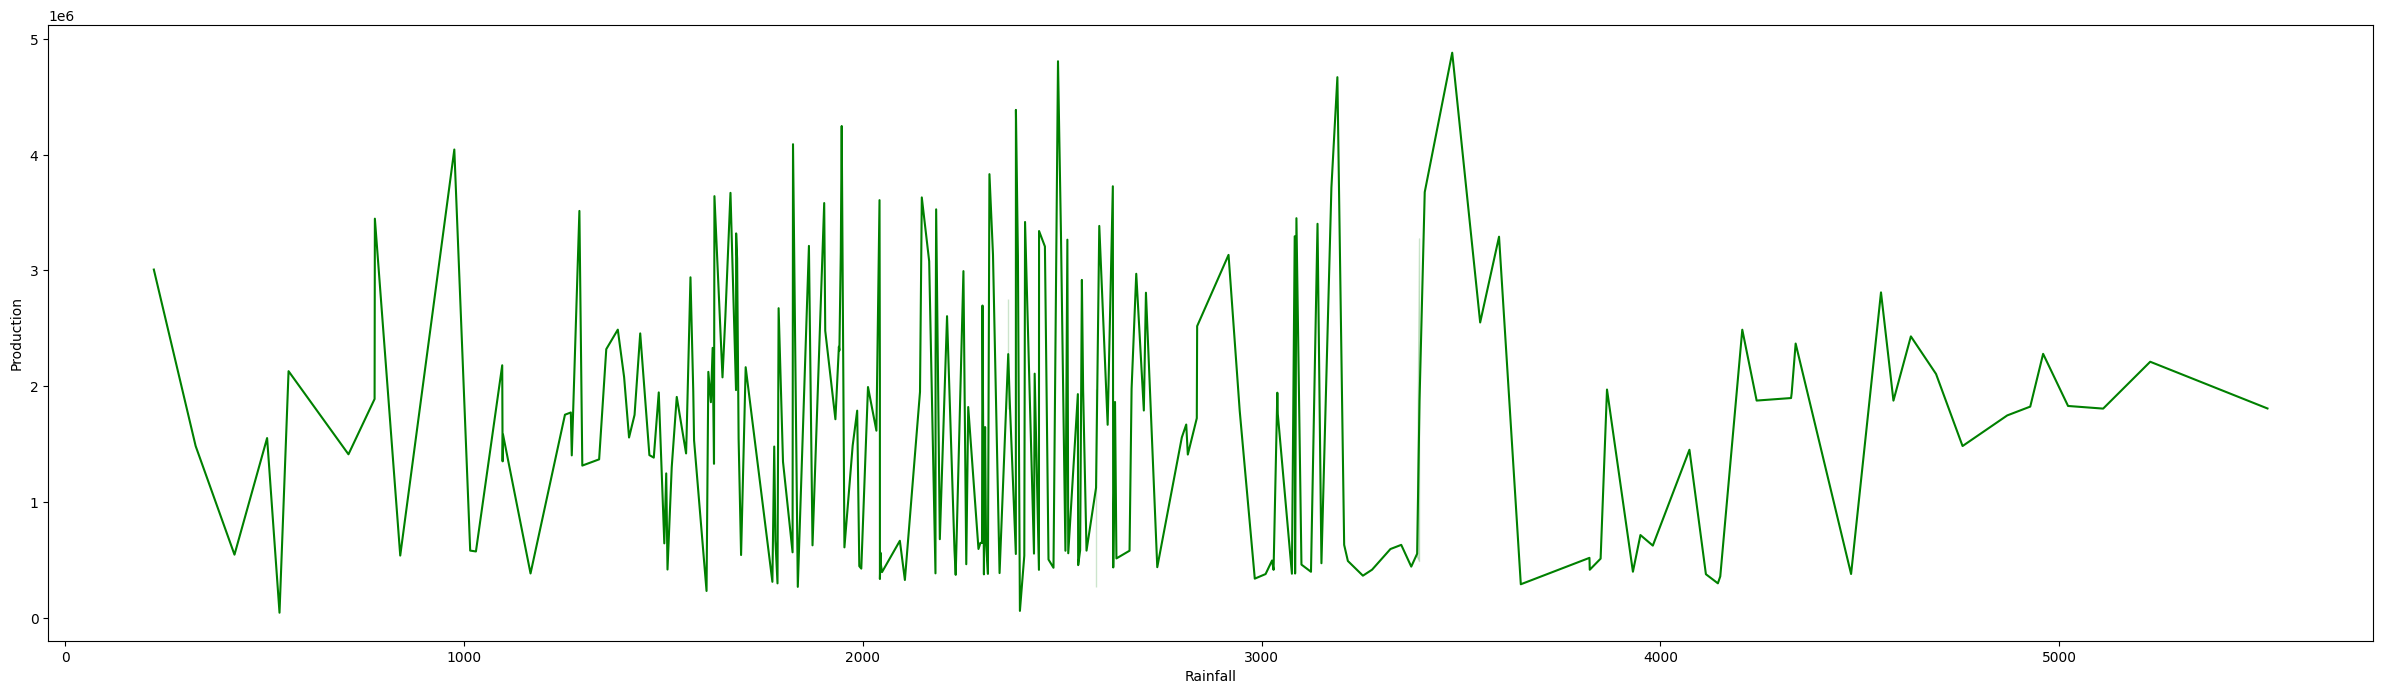

In [ ]:
plt.figure(figsize=(30,8))
# Pass the DataFrame to the 'data' argument and specify the x and y columns
sns.lineplot(data=data, x='Rainfall', y='Production', color='green')
plt.show()

Dapat dikatakan bahwa produksi mungkin lebih stabil pada curah hujan sedang, yaitu sekitar 2500 mm per tahun.

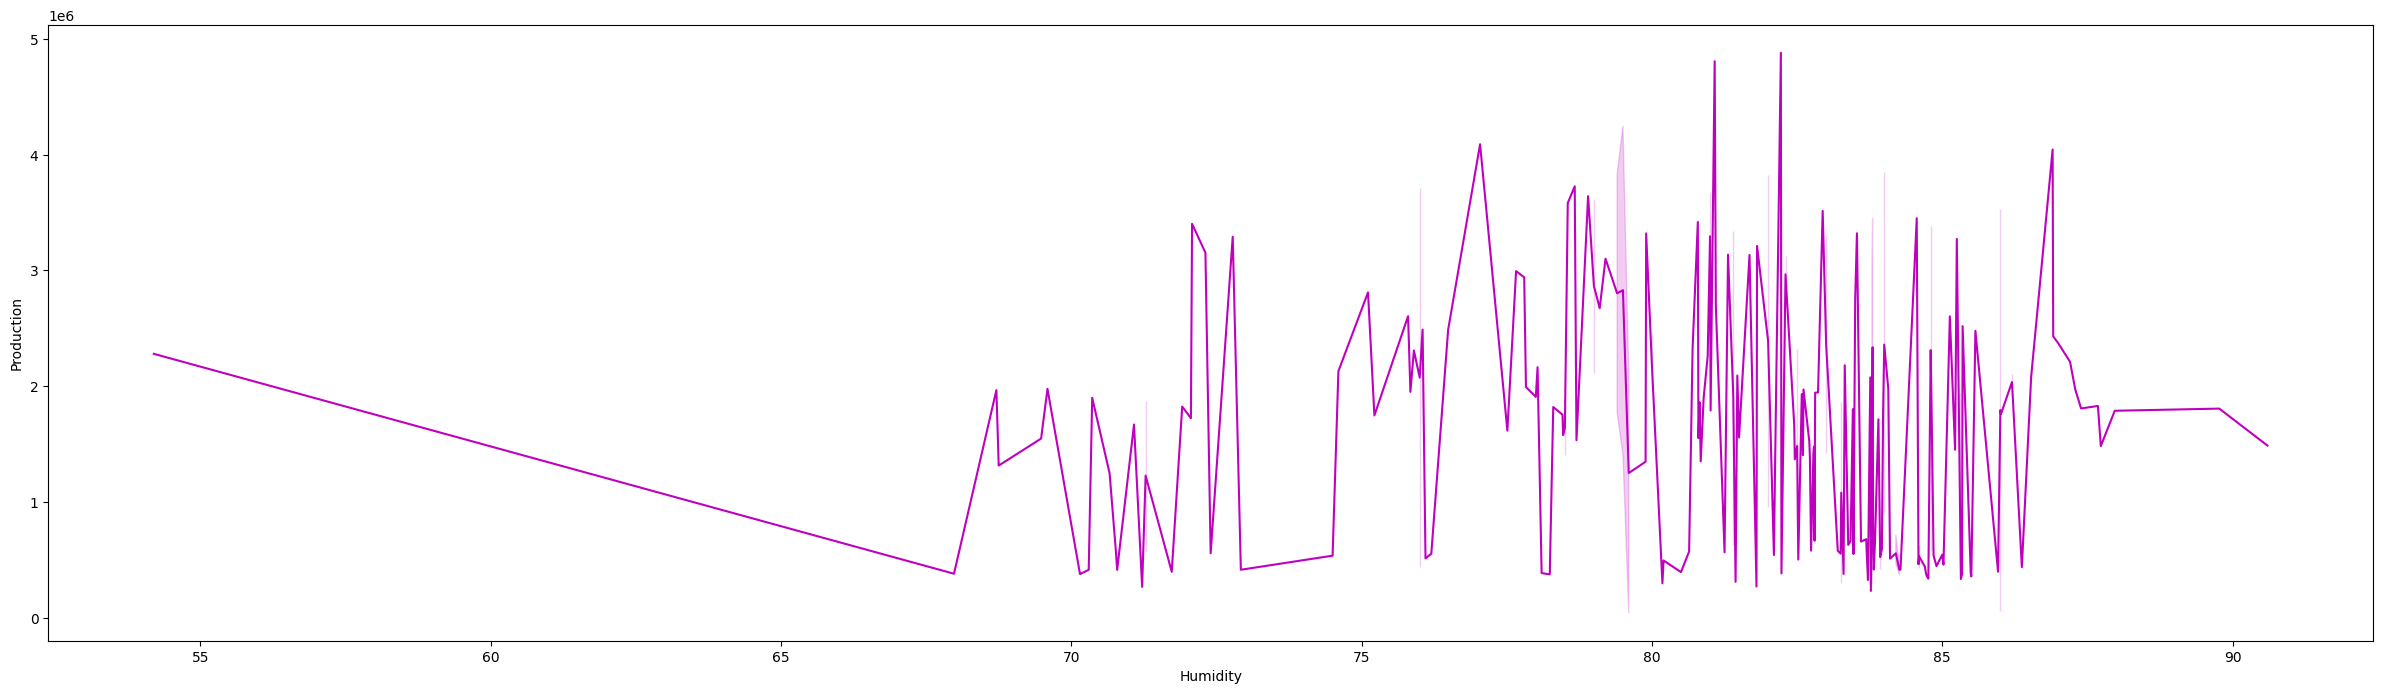

In [ ]:
plt.figure(figsize=(30,8))
# Pass the DataFrame to the 'data' argument and specify the x and y columns as strings
sns.lineplot(data=data, x='Humidity', y='Production', color='m')
plt.show()

Pada tingkat kelembapan sekitar 80-85%, produksi terlihat lebih optimal dan stabil.

Berdasarkan tujuan dari tugas ini, atribut yang akan menjadi output adalah hasil panen (kolom = Produksi).

a. Distribusi jumlah produksi

In [ ]:
#statistical plot
import scipy.stats as stats
import pylab as py

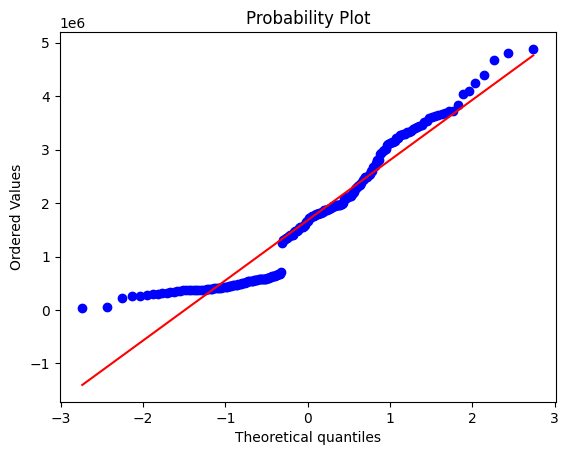

In [ ]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Production'], dist='norm', plot=py)
py.show()

QQ-plot di atas menunjukkan bagaimana data terdistribusi dari variabel yang dipilih, yaitu variabel Produksi. Plot di atas adalah plot dari nilai kuantil teoritis dengan nilai kuantil dari variabel yang dipilih. Jadi, plot tersebut akan menggambarkan berapa banyak nilai dalam suatu distribusi yang berada di atas atau di bawah batas tertentu. Dari hasil plot di atas, didapatkan bahwa garis cenderung lurus, yang berarti secara keseluruhan distribusi data variabel-variabel tersebut cenderung normal.

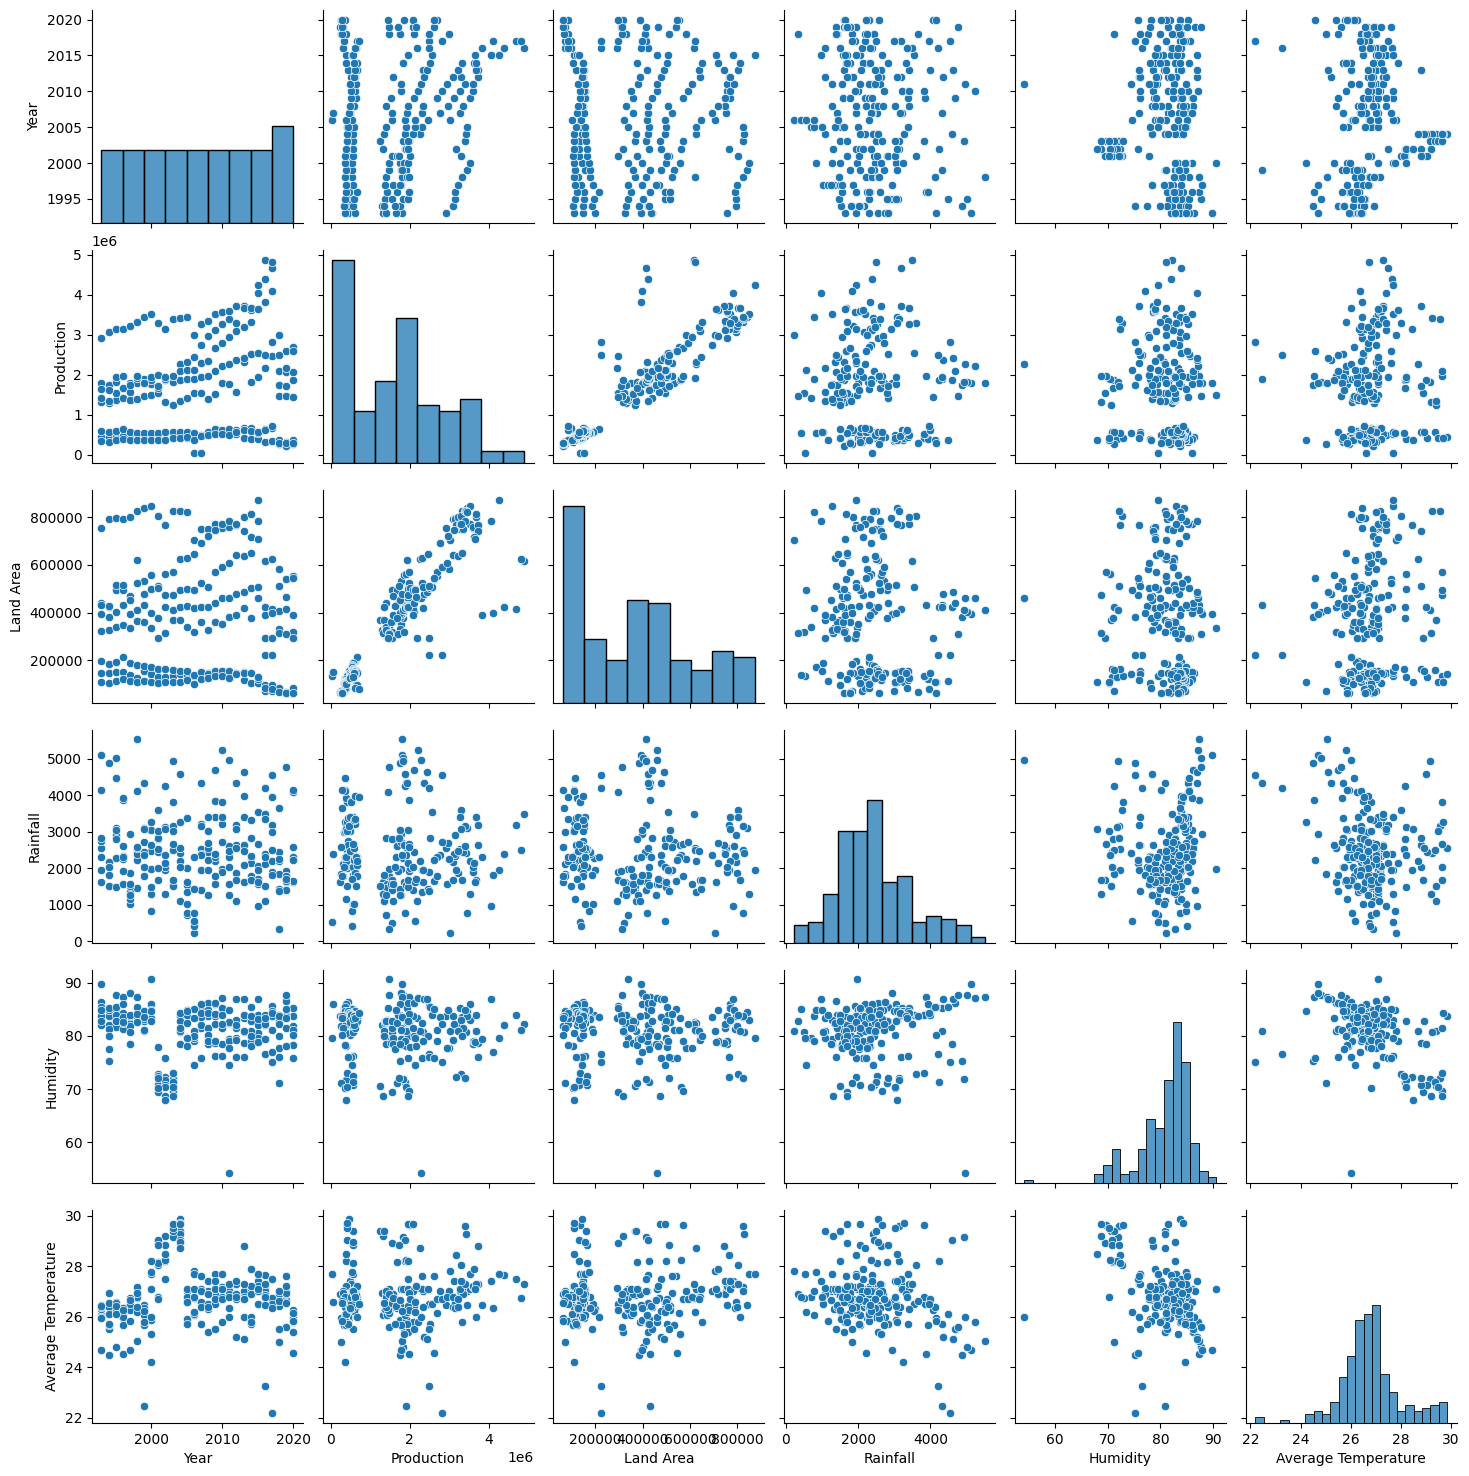

In [ ]:
sns.pairplot(data)

b. Memeriksa Outliers

<Axes: >

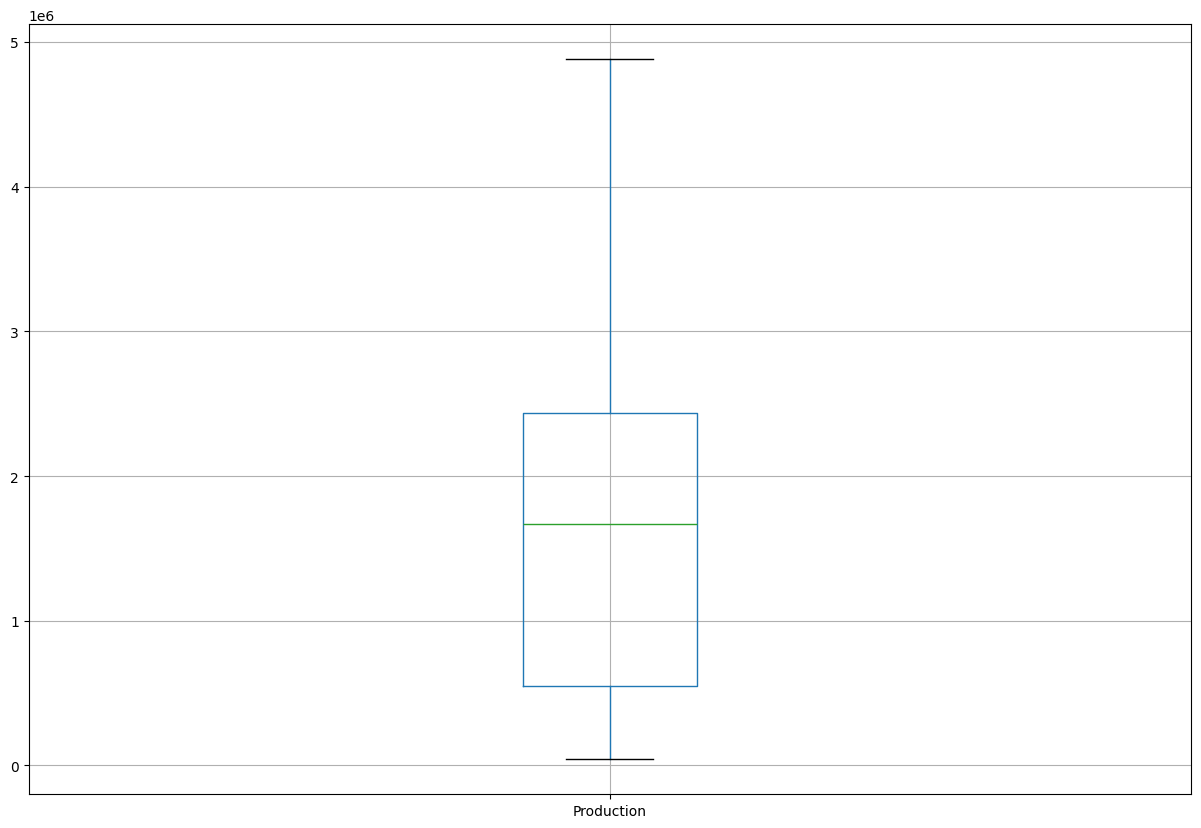

In [ ]:
data[['Production']].boxplot(figsize=(15,10))

Dari hasil visualisasi boxplot vertikal di atas, dapat dilihat bahwa tidak terdapat outlier dari variabel output, yaitu Produksi.

c. Matriks Korelasi antara variabel numerik

In [ ]:
data.columns

Index(['Province', 'Year', 'Production', 'Land Area', 'Rainfall', 'Humidity',
       'Average Temperature'],
      dtype='object')

In [ ]:
#change the column order
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Province,Year,Land Area,Rainfall,Humidity,Average Temperature,Production
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


Catatan:

Korelasi >= 0,5 ada hubungan yang erat antar variabel

Korelasi < 0,5 tidak ada hubungan yang erat antar variabel

In [ ]:
#change the column order
cols = list(data.columns)

df = data.copy()
# Drop the non-numerical 'Province' column before calculating correlation
df = df.drop(columns=['Province'])
# You can still perform the column reordering if needed for other purposes,
# but ensure the 'Province' column is handled separately for correlation.
# df = df[cols[0:2] + cols[3:7] + [cols[2]]] # This line is not needed for corr()

df.corr()

,Year,Production,Land Area,Rainfall,Humidity,Average Temperature
Year,1.000000,0.182527,-0.045951,-0.047645,-0.033474,0.004923
Production,0.182527,1.000000,0.905622,-0.042129,-0.052316,0.041160
Land Area,-0.045951,0.905622,1.000000,-0.092975,-0.061121,0.115726
Rainfall,-0.047645,-0.042129,-0.092975,1.000000,0.056466,-0.228699
Humidity,-0.033474,-0.052316,-0.061121,0.056466,1.000000,-0.407799
Average Temperature,0.004923,0.041160,0.115726,-0.228699,-0.407799,1.000000


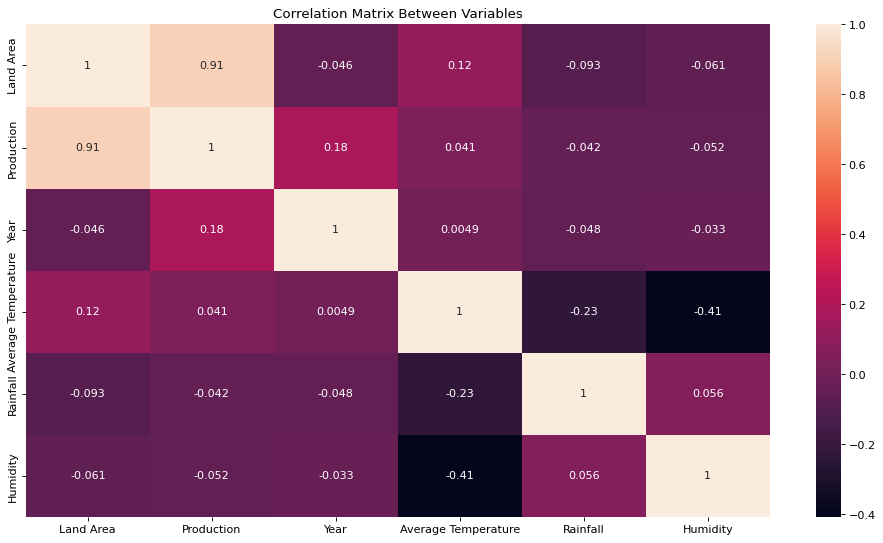

In [ ]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)

# Explicitly select the columns for correlation calculation
correlation_data = df[['Land Area', 'Production', 'Year', 'Average Temperature', 'Rainfall', 'Humidity']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = correlation_data.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Variables')
plt.show()

Dari matriks korelasi, dapat dilihat jenis korelasi antara variabel independen dengan variabel output.

Variabel luas lahan pertanian dan suhu rata-rata memiliki nilai korelasi positif, yang berarti bahwa ketika nilai variabel independen tersebut semakin besar, maka produksi juga akan meningkat, meskipun mungkin tidak signifikan (pengaruh dari suhu).

Sementara itu, variabel curah hujan dan kelembaban memiliki nilai korelasi negatif, yang berarti ketika kedua variabel tersebut semakin kecil, maka produksi akan semakin meningkat (pergerakan grafik bergerak terbalik), meskipun hubungannya tidak terlalu kuat.

# Pemilihan Data

**3. Data Preprocessing (Feature Engineering)**

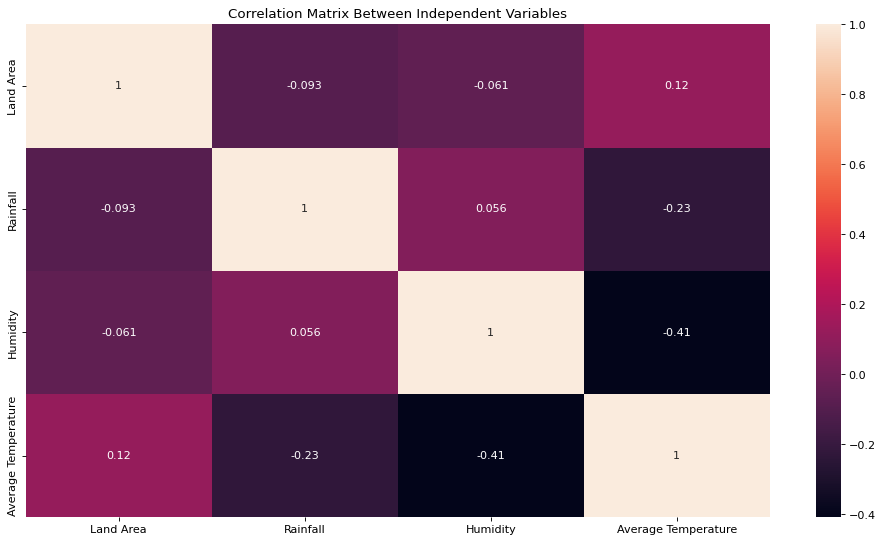

In [ ]:
#checking multicollinearity
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Land Area':'Average Temperature'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Independent Variables')
plt.show()

Multikolinearitas adalah suatu keadaan yang menunjukkan adanya korelasi atau hubungan yang kuat antara dua atau lebih variabel independen dalam suatu model regresi yang akan mempengaruhi kestabilan dan keakuratan model. Salah satu cara untuk mendeteksi adanya multikolinieritas di dalam model regresi adalah dengan melihat kekuatan korelasi antar variabel independen. Jika terdapat korelasi antar variabel independen > 0,8 maka dapat mengindikasikan adanya multikolinieritas.

Jadi, dari matriks di atas dapat disimpulkan bahwa tidak ditemukan adanya multikolinieritas.

**Feature Encoding**

Data kategorikal adalah variabel yang berisi nilai label dan bukan nilai numerik. Jumlah nilai yang mungkin sering kali terbatas pada satu set yang tetap, seperti dalam set data ini, nilai 'Provinsi'. Banyak algoritme pembelajaran mesin tidak dapat beroperasi pada data label secara langsung. Mereka membutuhkan semua variabel input dan variabel output berupa angka. Ini berarti bahwa data kategorikal harus dikonversi ke bentuk numerik.

One Hot Encoding adalah proses dimana variabel kategorikal dikonversi ke dalam bentuk yang dapat diberikan kepada algoritma ML untuk melakukan pekerjaan yang lebih baik dalam prediksi. Untuk itu, One-Hot Encoding akan digunakan untuk mengubah kolom 'Provinsi' menjadi larik numerik satu-panas.

Nilai kategorikal mewakili nilai numerik dari entri dalam kumpulan data. Pengkodean ini akan membuat kolom biner untuk setiap kategori dan mengembalikan matriks dengan hasilnya.

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

# Use a copy of the original data DataFrame which still contains 'Province'
df_encoded = data.copy()

string_feat = ['Province']
ohe = OneHotEncoder()

# Fit and transform on the 'Province' column of the copied DataFrame
ohe.fit(df_encoded[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df_encoded[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())

# Concatenate the encoded features with the original DataFrame copy
df_encoded = pd.concat([df_encoded, data_ohe_res], axis=1)

# Drop the original 'Province' column from the DataFrame copy
df_encoded = df_encoded.drop(columns=string_feat)

# You can now use df_encoded for subsequent steps like model training
df_encoded.head()

,Year,Production,Land Area,Rainfall,Humidity,Average Temperature,Province_Aceh,Province_Bengkulu,Province_Jambi,Province_Lampung,Province_Riau,Province_Sumatera Barat,Province_Sumatera Selatan,Province_Sumatera Utara
0,1993,1329536.0,323589.0,1627.0,82.00,26.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,1299699.0,329041.0,1521.0,82.12,26.92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,1382905.0,339253.0,1476.0,82.72,26.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,1419128.0,348223.0,1557.0,83.00,26.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,1368074.0,337561.0,1339.0,82.46,26.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fitur encoding merupakan proses mengubah fitur atau variabel dalam dataset menjadi format numerik yang dapat digunakan oleh algoritma machine learning. Pada data kategorikal merupakan data berupa yang label ataupun angka, seperti pada nama provinsi di kolom "Provinsi". Karena sebagian besar algoritma pada machine learning tidak dapat memahami label secara langsung, pada data ini perlu diubah menjadi data angka. Salah satu cara yang sering digunakan adalah One Hot Encoding.
Dengan One Hot Incoding, setiap kategori dapat di ubah (contoh: "Aceh") diubah menjadi kolom baru. Pada setiap baris, kolom yang sesuai dengan kategori akan diberi nilai I, sedangkan kolom lainnya diberi nilai 0.

**Feature Selection**

In [ ]:
df = df.drop(columns='Year')
df.tail()

,Production,Land Area,Rainfall,Humidity,Average Temperature
219,3831923.00,390799.00,2317.6,79.40,26.45
220,4090654.00,396559.00,1825.1,77.04,26.36
221,2488641.91,511940.93,1385.8,76.05,25.50
222,2164089.33,464103.42,1706.4,78.03,27.23
223,2604913.29,545149.05,2211.3,75.80,24.58


In [ ]:
x = df.drop('Production',axis=1)
y = df[['Production']]


df.drop(columns="Tahun") adalah cara efektif untuk menghapus kolom tertentu dari DataFrame.

df.tail() membantu menampilkan 5 baris terakhir untuk memeriksa hasil perubahan.
Kedua fungsi ini adalah bagian penting dari manipulasi data menggunakan pandas di Python.

**Train and Test Split**

Dataset akan dibagi menjadi dua dataset, yaitu dataset pelatihan dan dataset pengujian. Data biasanya cenderung dibagi secara tidak sama karena untuk melatih model biasanya membutuhkan sebanyak mungkin titik data, pembagian yang umum digunakan adalah 70/30 atau 80/20 untuk train/test.

Dataset pelatihan adalah dataset awal yang digunakan untuk melatih algoritma ML untuk belajar dan menghasilkan prediksi yang tepat. (70% dari dataset adalah dataset pelatihan).

Sedangkan dataset pengujian digunakan untuk menilai seberapa baik algoritma ML dilatih dengan dataset pelatihan. Kita tidak bisa begitu saja menggunakan kembali dataset training pada tahap testing karena algoritma ML sudah “mengetahui” hasil yang diharapkan, dan hal ini mengalahkan tujuan dari pengujian algoritma tersebut. (30% dari dataset adalah dataset pengujian)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 4)
x_test : (68, 4)
y_train : (156, 1)
y_test : (68, 1)


In [ ]:
x_train[:5]

,Land Area,Rainfall,Humidity,Average Temperature
166,539316.52,1655.5,85.13,27.60
40,822073.00,776.7,83.80,27.00
13,320789.00,506.5,80.80,26.73
122,159463.00,2508.1,71.28,29.39
89,126280.00,2233.0,84.26,26.73


In [ ]:
y_test.tail()

,Production
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


Dalam machine learning, data biasanya dibagi menjadi dua bagian:
data pelatihan dan data pengujian.

Data pelatihan digunakan untuk mengajarkanı model agar dapat mengenali pola-pola dalam data, sementara data pengujian digunakan untuk mengevaluasi seberapa baik model tersebut bekerja pada data yang belum pernah dilihat sebelumnya

**Feature Scaling**

Dataset ini berisi fitur-fitur yang sangat bervariasi dalam hal magnitudo, unit, dan jangkauan. Fitur dengan magnitudo tinggi akan memiliki bobot yang lebih besar dalam penghitungan jarak daripada fitur dengan magnitudo rendah.

Untuk menekan efek ini, kita perlu membawa semua fitur ke tingkat magnitudo yang sama. Hal ini dapat dicapai dengan melakukan penskalaan.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
x_train[:5]

array([[ 7.16699915e-01, -8.39566916e-01,  9.37541781e-01,
         6.92312495e-01],
       [ 1.92735709e+00, -1.70505807e+00,  6.36262189e-01,
         2.09231762e-01],
       [-2.18952945e-01, -1.97116607e+00, -4.33158388e-02,
        -8.15456793e-03],
       [-9.09690355e-01,  1.21023610e-04, -2.19984345e+00,
         2.13350335e+00],
       [-1.05176751e+00, -2.70812770e-01,  7.40464153e-01,
        -8.15456793e-03]])

In [ ]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457]
 [-0.90969035  0.00012102 -2.19984345  2.13350335]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [ ]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.678829945386355


In [ ]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [ ]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434]
 [-1.11782994  0.78499627  0.58002828 -0.51131204]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


# Pembuatan Model

**4. Modeling**

Pemodelan ini dilakukan dengan menggunakan 6 algoritma yaitu:

  1. Linear Regression

  2. Random Forest Regressor

  3. Gradient Boosting

  4. Support Vector Regressor

  5. Decision Tree Regressor

  6. K-Nearest Neighbors Regressor.


Untuk setiap model akan dilakukan tuning hyperparameter untuk meningkatkan performa model berdasarkan nilai R2 (Koefisien Determinasi). Untuk menemukan parameter terbaik akan menggunakan Grid Search CV atau Randomized Search CV, dan tergantung bagaimana algoritma bekerja.

Cross-validation (CV) adalah prosedur resampling yang digunakan untuk mengevaluasi model machine learning pada sampel data yang terbatas. Prosedur ini memiliki satu parameter yang disebut k yang akan dibagi menjadi beberapa sampel data. Oleh karena itu, prosedur ini sering disebut k-fold cross-validation.

Untuk mengecek bagaimana prediksi model, akan ditampilkan visualisasi dalam bentuk gambar grafis berupa distplot dari hasil estimasi algoritma dengan data asli.

Nantinya akan dilakukan evaluasi untuk menentukan algoritma terbaik dari keenam algoritma yang akan dipilih.


Catatan: Setelah selesai melakukan tuning hyperparameter menggunakan Randomized Search CV, kode tersebut digunakan sebagai komentar karena ketika kode tersebut dijalankan kembali, hasil tuningnya akan berbeda, walaupun nilai modelnya tidak jauh berbeda.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**Linear Regression**

Regresi Linier adalah algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai variabel berdasarkan nilai variabel lainnya.

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))   #do the inverse to return to the original value (because it was previously standardized)
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,5.976109e+05
64,1.973246e+06
65,1.740915e+06
66,1.693206e+06
67,1.344580e+06


<ipython-input-63-cfade503f485>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
<ipython-input-63-cfade503f485>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_LinReg, hist=False, label='Predicted')


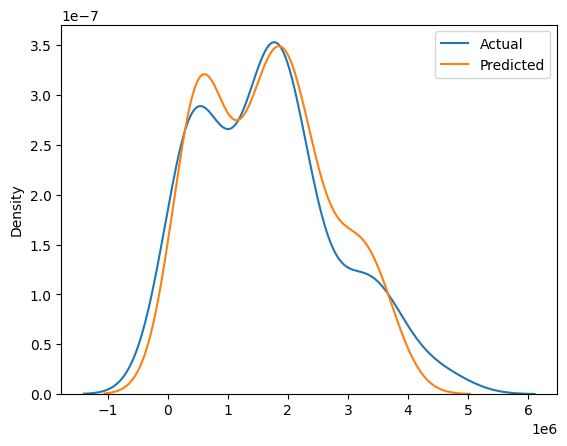

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  81.70881209289536
Test  :  84.60201877609485 

The Average Cross Validation Score is 81.79


Hyperparameter Tuning

In [ ]:
LinReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11),
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': False, 'n_jobs': np.int64(1), 'positive': False}
Best score is 0.8261190129348606


Fit New Model

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

In [ ]:
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,5.583476e+05
64,1.900467e+06
65,1.838223e+06
66,1.877250e+06
67,1.336414e+06


<ipython-input-69-090bb80219fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-69-090bb80219fe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')


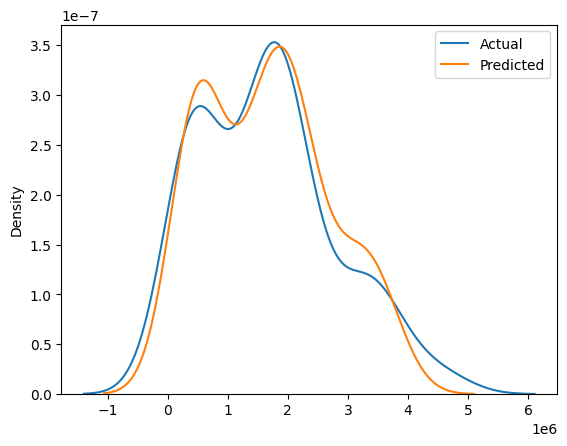

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  80.99708627697653
Test  :  85.5262596423416 

The Average Cross Validation Score is 81.59


Model baru Regresi Linier telah mengalami perubahan sedikit setelah tuning hiperparameter

**Random Forest Regression**

Random Forest Regressor adalah sebuah algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai keberlanjutan.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=0)

In [ ]:
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

,0
63,4.474549e+05
64,1.921762e+06
65,2.025571e+06
66,2.055086e+06
67,2.149467e+06


<ipython-input-73-335475504ac8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-73-335475504ac8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_RFReg,hist=False,label='Predicted')


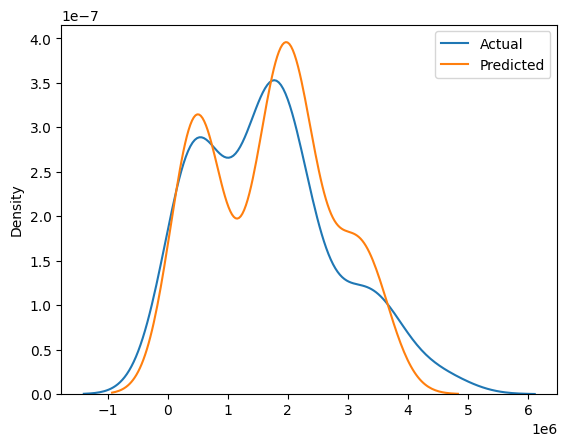

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Train :  94.60154755945557
Test  :  82.37181903433934 

The Average Cross Validation Score is 82.14


Hyperparameter Tuning

In [ ]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'bootstrap' : [True, False],
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': np.arange(100, 501)}

RFReg_tuning = RandomForestRegressor()

RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

RFReg_best_model = RFReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', RFReg_best_model.best_params_)
print('Best score is {}'.format(RFReg_best_model.best_score_))

Optimum parameters {'n_estimators': np.int64(182), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(1), 'max_depth': np.int64(2), 'bootstrap': True}
Best score is 0.8341987343628782


Fit New Model

In [ ]:
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=9, n_estimators=227, random_state=0)

In [ ]:
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,4.331215e+05
64,1.914826e+06
65,2.098621e+06
66,2.010094e+06
67,2.145977e+06


<ipython-input-80-3713ed13d5b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-80-3713ed13d5b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')


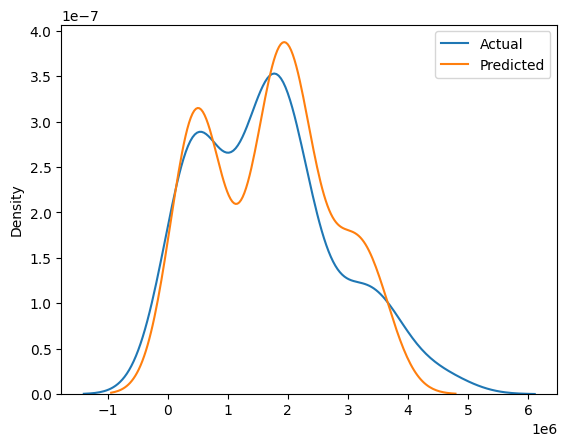

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100


#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression
Train :  97.32112285797376
Test  :  82.82312855387694 

The Average Cross Validation Score is 81.59


Model Regresi Random Forest mengalami sedikit perubahan setelah menerapkan beberapa parameter yang telah dituning.

**Gradient Boosting**

Gradient Boosting Regressor memberikan model prediksi dalam bentuk ansambel model prediksi yang lemah, yang biasanya berupa decision tree.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
GBReg.fit(x_train, y_train.ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)

In [ ]:
ypred_GBReg = sc.inverse_transform(GBReg.predict(x_test).reshape(-1,1))
y_pred_GBReg = pd.DataFrame(ypred_GBReg)
y_pred_GBReg.tail()

,0
63,4.319142e+05
64,2.029467e+06
65,2.299230e+06
66,2.027984e+06
67,2.319487e+06


<ipython-input-84-b4545790db52>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-84-b4545790db52>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_GBReg,hist=False,label='Predicted')


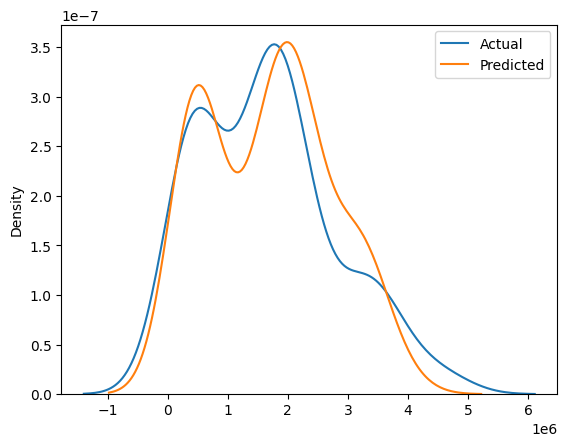

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_GBReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_train = GBReg.score(x_train,y_train.ravel())*100
GBReg_test = GBReg.score(x_test, y_test)*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_score = cross_val_score(GBReg,x,y,cv=GBReg_cv)

print('Train : ',GBReg_train)
print('Test  : ',GBReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_score)*100,2))

Gradient Boosting Regression


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

Train :  99.99972557287872
Test  :  82.12291187860768 

The Average Cross Validation Score is 80.53


Hyperparameter Tuning

In [ ]:
GBReg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'subsample' : np.arange(0.1, 1.1),
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': [500, 1000, 2000],
              'learning_rate': [0.001, 0.01, 0.1] }

GBReg_tuning = GradientBoostingRegressor()

GBReg_search = RandomizedSearchCV(GBReg_tuning, param_grid, cv = 10, scoring='r2')

GBReg_best_model = GBReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', GBReg_best_model.best_params_)
print('Best score is {}'.format(GBReg_best_model.best_score_))

Optimum parameters {'subsample': np.float64(0.1), 'n_estimators': 2000, 'min_samples_split': np.int64(5), 'min_samples_leaf': np.int64(2), 'max_depth': np.int64(6), 'learning_rate': 0.01}
Best score is 0.8132397601710284


Fit New Model

In [ ]:
GBReg_model = GradientBoostingRegressor(subsample= 0.1, n_estimators= 2000, min_samples_split= 9, min_samples_leaf= 1, max_depth= 10, learning_rate= 0.01, random_state= 0)
GBReg_model.fit(x_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=9,
                          n_estimators=2000, random_state=0, subsample=0.1)

In [ ]:
ypred_GBReg_model = sc.inverse_transform(GBReg_model.predict(x_test).reshape(-1,1))
ypred_GBReg_model = pd.DataFrame(ypred_GBReg_model)
ypred_GBReg_model.tail()

,0
63,3.079582e+05
64,2.102593e+06
65,2.253314e+06
66,2.124126e+06
67,1.352572e+06


<ipython-input-90-d303818dc71e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-90-d303818dc71e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')


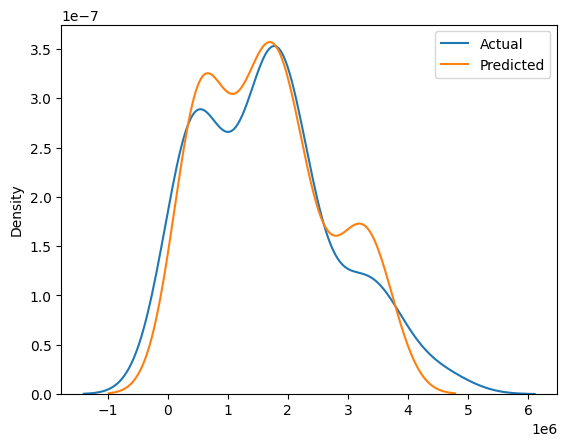

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_model_train = GBReg_model.score(x_train,y_train.ravel())*100
GBReg_model_test = GBReg_model.score(x_test, y_test.ravel())*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_model_score = cross_val_score(GBReg_model,x,y,cv=GBReg_model_cv)

print('Train : ',GBReg_model_train)
print('Test  : ',GBReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_model_score)*100,2))

Gradient Boosting Regression


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

Train :  91.29300425886903
Test  :  84.8644255035886 

The Average Cross Validation Score is 82.98


Model regresi baru dengan algoritma gradient boosting mengalami penurunan akurasi pada data latih tetapi meningkat pada data uji.

**Support Vector Regression**

SVR memberikan fleksibilitas untuk menentukan seberapa besar kesalahan yang dapat diterima dalam model dan akan menemukan garis yang sesuai (atau hyperplane dalam dimensi yang lebih tinggi) agar sesuai dengan data.

In [ ]:
from sklearn.svm import SVR
SVReg = SVR(gamma = 1)
SVReg.fit(x_train, y_train.ravel())

SVR(gamma=1)

In [ ]:
ypred_SVReg = sc.inverse_transform(SVReg.predict(x_test).reshape(-1,1))
y_pred_SVReg = pd.DataFrame(ypred_SVReg)
y_pred_SVReg.tail()

,0
63,3.993978e+05
64,1.826478e+06
65,2.071883e+06
66,1.702127e+06
67,1.276336e+06


<ipython-input-94-b9bf3e27b4a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-94-b9bf3e27b4a0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_SVReg,hist=False,label='Predicted')


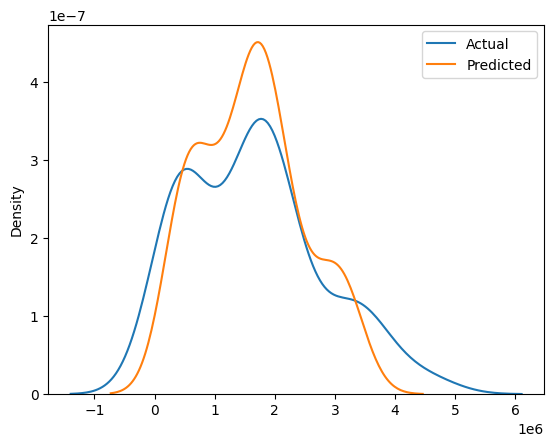

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_SVReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_train = SVReg.score(x_train,y_train.ravel())*100
SVReg_test = SVReg.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_score = cross_val_score(SVReg,x,y,cv=SVReg_cv)

print('Train : ',SVReg_train)
print('Test  : ',SVReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_score)*100,2))

Support Vector Regression
Train :  90.47838931322781
Test  :  77.36791101367218 

The Average Cross Validation Score is -7.15


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Hyperparameter Tuning

In [ ]:
SVReg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.001, 0.01, 0.1]}

SVReg_tuning = SVR()

SVReg_search = GridSearchCV(SVReg_tuning, param_grid, cv = 10, scoring='r2')

SVReg_best_model = SVReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', SVReg_best_model.best_params_)
print('Best score is {}'.format(SVReg_best_model.best_score_)) # Added closing parenthesis

Optimum parameters {'C': 10, 'epsilon': 0.01, 'gamma': 0.1}
Best score is 0.8356358188986551


Fit New Model

In [ ]:
SVReg_model = SVR(C= 1, epsilon= 0.1, gamma= 0.1)
SVReg_model.fit(x_train, y_train.ravel())

SVR(C=1, gamma=0.1)

In [ ]:
ypred_SVReg_model = sc.inverse_transform(SVReg_model.predict(x_test).reshape(-1,1))
ypred_SVReg_model = pd.DataFrame(ypred_SVReg_model)
ypred_SVReg_model.tail()

,0
63,4.019018e+05
64,1.817542e+06
65,1.890476e+06
66,1.693024e+06
67,1.236504e+06


<ipython-input-101-817de56a18ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-101-817de56a18ba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')


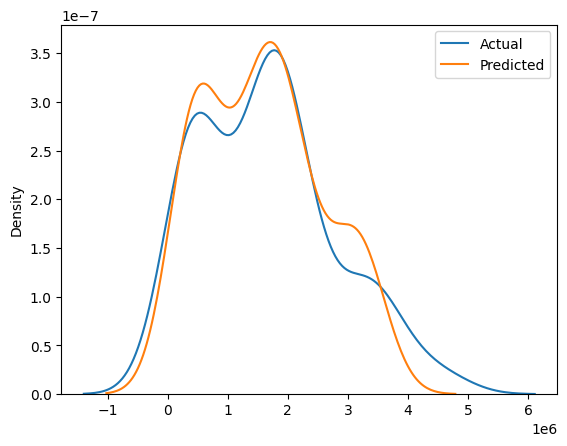

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_model_train = SVReg_model.score(x_train,y_train.ravel())*100
SVReg_model_test = SVReg_model.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_model_score = cross_val_score(SVReg,x,y,cv=SVReg_model_cv)

print('Train : ',SVReg_model_train)
print('Test  : ',SVReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_model_score)*100,2))

Support Vector Regression
Train :  84.8129610196132
Test  :  82.85804707622187 

The Average Cross Validation Score is -7.15


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model regresi vektor pendukung mengalami penurunan akurasi pada data latih namun meningkat pada data uji, yang berarti overfitting telah diminimalkan.

**Decision Tree Regression**

Decision Tree Regressor adalah algoritma untuk membangun model regresi yang mengamati fitur-fitur suatu objek dan melatih model tersebut dalam struktur pohon.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

,0
63,4.291586e+05
64,2.042831e+06
65,2.045166e+06
66,2.045166e+06
67,2.392152e+06


<ipython-input-105-0fe236d599e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-105-0fe236d599e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')


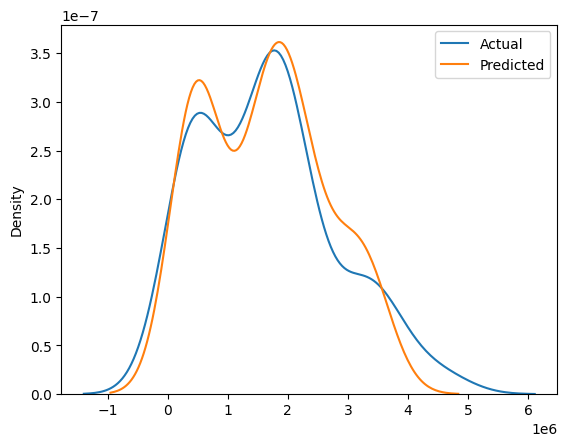

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Decision Tree Regression model
print('Decision Tree Regression')
DTreeReg_train = DTreeReg.score(x_train,y_train)*100
DTreeReg_test = DTreeReg.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_score = cross_val_score(DTreeReg,x,y,cv=DTreeReg_cv)

print('Train : ',DTreeReg_train)
print('Test  : ',DTreeReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_score)*100,2))

Decision Tree Regression
Train :  100.0
Test  :  80.84140175009962 

The Average Cross Validation Score is 67.65


Hyperparameter Tuning

In [ ]:
DTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
param_grid = {'splitter' : ['best', 'random'],
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'max_features':['auto','log2','sqrt',None]}

DTreeReg_tuning = DecisionTreeRegressor()

DTreeReg_search = RandomizedSearchCV(DTreeReg_tuning, param_grid, cv = 10, scoring='r2')

DTreeReg_best_model = DTreeReg_search.fit(x_train, y_train)
print('Optimum parameters', DTreeReg_best_model.best_params_)
print('Best score is {}'.format(DTreeReg_best_model.best_score_))

Optimum parameters {'splitter': 'best', 'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(8), 'max_features': None, 'max_depth': np.int64(7)}
Best score is 0.7958198942158611


Fit New Model

In [ ]:
DTreeReg_model = DecisionTreeRegressor(splitter= 'best', min_samples_split= 8, min_samples_leaf= 5, max_features= 'sqrt', max_depth= 2, random_state= 0)
DTreeReg_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=8, random_state=0)

In [ ]:
ypred_DTreeReg_model = sc.inverse_transform(DTreeReg_model.predict(x_test).reshape(-1,1))
ypred_DTreeReg_model = pd.DataFrame(ypred_DTreeReg_model)
ypred_DTreeReg_model.tail()

,0
63,1.304185e+06
64,1.781508e+06
65,1.304185e+06
66,1.304185e+06
67,9.464574e+05


<ipython-input-112-ea98c86190fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-112-ea98c86190fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')


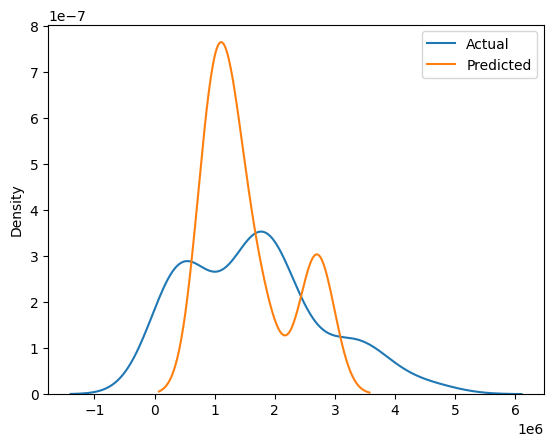

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Decision Tree Regression model
print('Decision Tree Regression')
DTreeReg_model_train = DTreeReg_model.score(x_train,y_train)*100
DTreeReg_model_test = DTreeReg_model.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_model_score = cross_val_score(DTreeReg_model,x,y,cv=DTreeReg_model_cv)

print('Train : ',DTreeReg_model_train)
print('Test  : ',DTreeReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_model_score)*100,2))

Decision Tree Regression
Train :  41.2784804983682
Test  :  24.907696967330384 

The Average Cross Validation Score is 32.61


Model regresi Decision Tree yang telah menggunakan hasil tuning hyperparameter menunjukkan performa yang lebih seimbang antara data latih dan data uji.

**K-Neighbors Regression**

KNN Regressor adalah sebuah algoritma untuk membangun sebuah model regresi yang menggunakan nilai rata-rata atau median dari k tetangga untuk memprediksi elemen target.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNNReg = KNeighborsRegressor(n_neighbors=1)
KNNReg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
ypred_KNNReg = sc.inverse_transform(KNNReg.predict(x_test).reshape(-1,1))
y_pred_KNNReg = pd.DataFrame(ypred_KNNReg)
y_pred_KNNReg.tail()

,0
63,3.235765e+05
64,1.783884e+06
65,2.459264e+06
66,1.826944e+06
67,6.401804e+05


<ipython-input-116-c83982f615a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-116-c83982f615a0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')


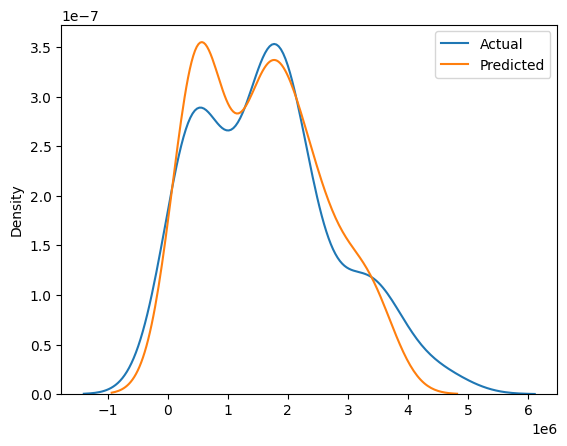

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the K-Nearest Neighbors Regression model
print('K-Nearest Neighbors Regression')
KNNReg_train = KNNReg.score(x_train,y_train)*100
KNNReg_test = KNNReg.score(x_test, y_test)*100

#Assess the performance of the K-Nearest Neighbor Regression method by dividing the sample data by 10 folds randomly
KNNReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_score = cross_val_score(KNNReg,x,y,cv=KNNReg_cv)

print('Train : ',KNNReg_train)
print('Test  : ',KNNReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_score)*100,2))

K-Nearest Neighbors Regression
Train :  100.0
Test  :  81.96210827323763 

The Average Cross Validation Score is 71.02


Hyperparameter Tuning

In [ ]:
KNNReg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 10)}

KNNReg_tuning = KNeighborsRegressor()

KNNReg_search = GridSearchCV(KNNReg_tuning, param_grid, cv=10, scoring='r2')

KNNReg_best_model = KNNReg_search.fit(x_train, y_train)
print('Optimum parameters', KNNReg_best_model.best_params_)
print('Best score is {}'.format(KNNReg_best_model.best_score_))

Optimum parameters {'n_neighbors': np.int64(6)}
Best score is 0.8026077062765984


Fit New Model

In [ ]:
KNNReg_model = KNeighborsRegressor(n_neighbors= 3)
KNNReg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
ypred_KNNReg_model = sc.inverse_transform(KNNReg_model.predict(x_test).reshape(-1,1))
ypred_KNNReg_model = pd.DataFrame(ypred_KNNReg_model)
ypred_KNNReg_model.tail()

,0
63,4.463198e+05
64,1.896004e+06
65,2.876745e+06
66,1.371239e+06
67,9.276843e+05


<ipython-input-122-f84a9614df4a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-122-f84a9614df4a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')


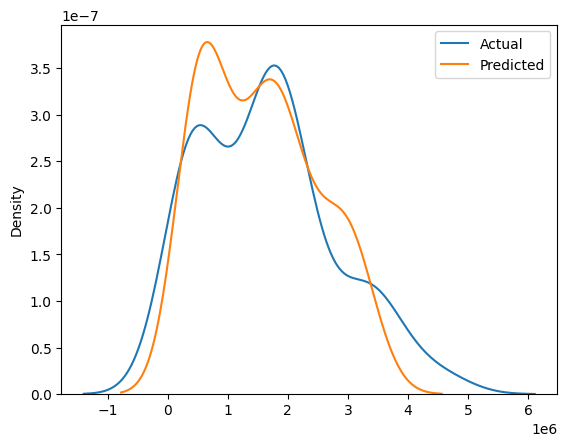

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the K-Nearest Neighbors Regression model
print('K-Nearest Neighbors Regression')
KNNReg_model_train = KNNReg_model.score(x_train,y_train)*100
KNNReg_model_test = KNNReg_model.score(x_test, y_test)*100

#Assess the performance of the K-Nearest Neighbor Regression method by dividing the sample data by 10 folds randomly
KNNReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_model_score = cross_val_score(KNNReg_model,x,y,cv=KNNReg_model_cv)

print('Train : ',KNNReg_model_train)
print('Test  : ',KNNReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_model_score)*100,2))

K-Nearest Neighbors Regression
Train :  89.18367303214985
Test  :  82.71621260023934 

The Average Cross Validation Score is 77.2


Setelah tuning hyperparameter, model baru ini tidak lagi cenderung overfit.

**5. Evaluasi Model**

Evaluasi di bawah ini dilakukan dengan menggunakan rata-rata kesalahan absolut, rata-rata kesalahan kuadrat, dan skor r2. Semakin kecil rata-rata kesalahan absolut dan rata-rata kesalahan kuadrat, namun semakin besar nilai R2, maka semakin baik algoritmanya.

R2-score (koefisien determinasi) fungsi skor regresi akan merepresentasikan proporsi varians untuk item (tanaman) dalam model regresi. R2-score menunjukkan seberapa baik istilah (titik data) sesuai dengan kurva atau garis.

Mean absolute error (MAE) mewakili rata-rata perbedaan absolut antara nilai aktual dan nilai prediksi dalam kumpulan data. MAE mengukur rata-rata residual dalam kumpulan data.

Mean Squared Error (MSE) mewakili rata-rata perbedaan kuadrat antara nilai asli dan nilai prediksi dalam kumpulan data. Ini mengukur varians dari residual.



In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]
results.loc['SVR']=[r2_score(sc.inverse_transform(y_test),ypred_SVReg_model)*100,
                    mean_absolute_error(sc.inverse_transform(y_test),ypred_SVReg_model),
                    mean_squared_error(sc.inverse_transform(y_test),ypred_SVReg_model)]
results.loc['Decision Tree']=[r2_score(sc.inverse_transform(y_test),ypred_DTreeReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_DTreeReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),ypred_DTreeReg_model)]
results.loc['K-Neighbors']=[r2_score(sc.inverse_transform(y_test),ypred_KNNReg_model)*100,
                            mean_absolute_error(sc.inverse_transform(y_test),ypred_KNNReg_model),
                            mean_squared_error(sc.inverse_transform(y_test),ypred_KNNReg_model)]

#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,85.526260,221938.682671,176940698374.907990
Gradient Boosting,84.864426,267336.839755,185031585168.890594
SVR,82.858047,268481.507628,209559453665.217255
Random Forest,82.823129,253959.746132,215503565358.131348
K-Neighbors,82.716213,316904.942391,211293372515.067657
Decision Tree,24.907697,782006.834491,917999370781.194092


Dari hasil yang terlihat di atas, model dengan algoritma Regresi Linier memiliki nilai R2 tertinggi 85.5%. Sehingga, model ini dapat menjadi pilihan terbaik untuk digunakan dalam memprediksi produksi pertanian di Sumatera, sesuai dengan tujuan yang telah dijelaskan sebelumnya.